In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

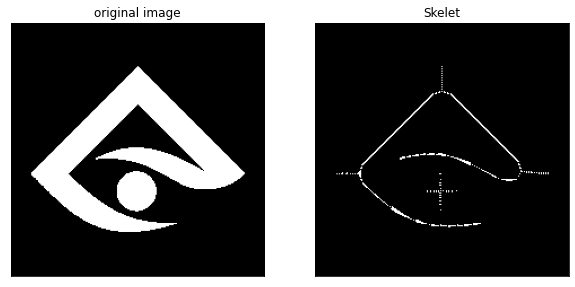

In [9]:
img = cv2.imread(filename="mazandaran.png", flags=cv2.IMREAD_GRAYSCALE)
thresh_val, img = cv2.threshold(src=img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
img = np.array(cv2.normalize(img.astype('uint8'), None, 0, 1, cv2.NORM_MINMAX))
original_img = img.copy()

# kernel
B = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))

skelet = np.zeros(img.shape, dtype=np.uint8)

# Until erode
while np.any(img):
    O = cv2.morphologyEx(img, cv2.MORPH_OPEN, B)
    skelet = skelet | cv2.subtract(img, O)
    img = cv2.erode(img, B, iterations = 1)


fig, axes = plt.subplots(1,2, figsize=(10,8))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("original image")

axes[1].imshow(skelet, 'gray')
axes[1].set_title("Skelet")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
